In [ ]:
#Autor: Andrés
#Tarea: https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/20#issue-2913499571
#Objetivo: crear un arbol de decision que sepa predecir el ganador de una pelea 
#          en la base de datos que no contiene las estadisticas ponderadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import random
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [52]:
ruta_train = os.path.join("..","..", "data", "P1","train.parquet")
train = pd.read_parquet(ruta_train) 
train = train.drop(columns=["DATE","CATEGORY","METHOD","Peleador_A","Peleador_B",'TITLE_FIGHT', 'WOMEN','ROUND'])

ruta_val = os.path.join("..","..", "data", "P1","validation.parquet")
val = pd.read_parquet(ruta_val) 
val = val.drop(columns=["DATE","CATEGORY","METHOD","Peleador_A","Peleador_B",'TITLE_FIGHT', 'WOMEN','ROUND'])

ruta_test = os.path.join("..","..", "data", "P1","test.parquet")
test = pd.read_parquet(ruta_test) 
test = test.drop(columns=["DATE","CATEGORY","METHOD","Peleador_A","Peleador_B",'TITLE_FIGHT', 'WOMEN','ROUND'])

In [53]:
X_train = train.drop(columns=["WINNER"])
y_train = train["WINNER"]

X_val = val.drop(columns=["WINNER"])
y_val = val["WINNER"]

X_test = test.drop(columns=["WINNER"])
y_test = test["WINNER"]

Precision en el conjunto de validacion: 85.39%

Clasificacion (Validación):
              precision    recall  f1-score   support

       False       0.89      0.88      0.89       753
        True       0.79      0.81      0.80       424

    accuracy                           0.85      1177
   macro avg       0.84      0.84      0.84      1177
weighted avg       0.85      0.85      0.85      1177

Precision en el conjunto de test: 84.20%

Clasificacion (Test):
              precision    recall  f1-score   support

       False       0.88      0.88      0.88       746
        True       0.78      0.78      0.78       431

    accuracy                           0.84      1177
   macro avg       0.83      0.83      0.83      1177
weighted avg       0.84      0.84      0.84      1177



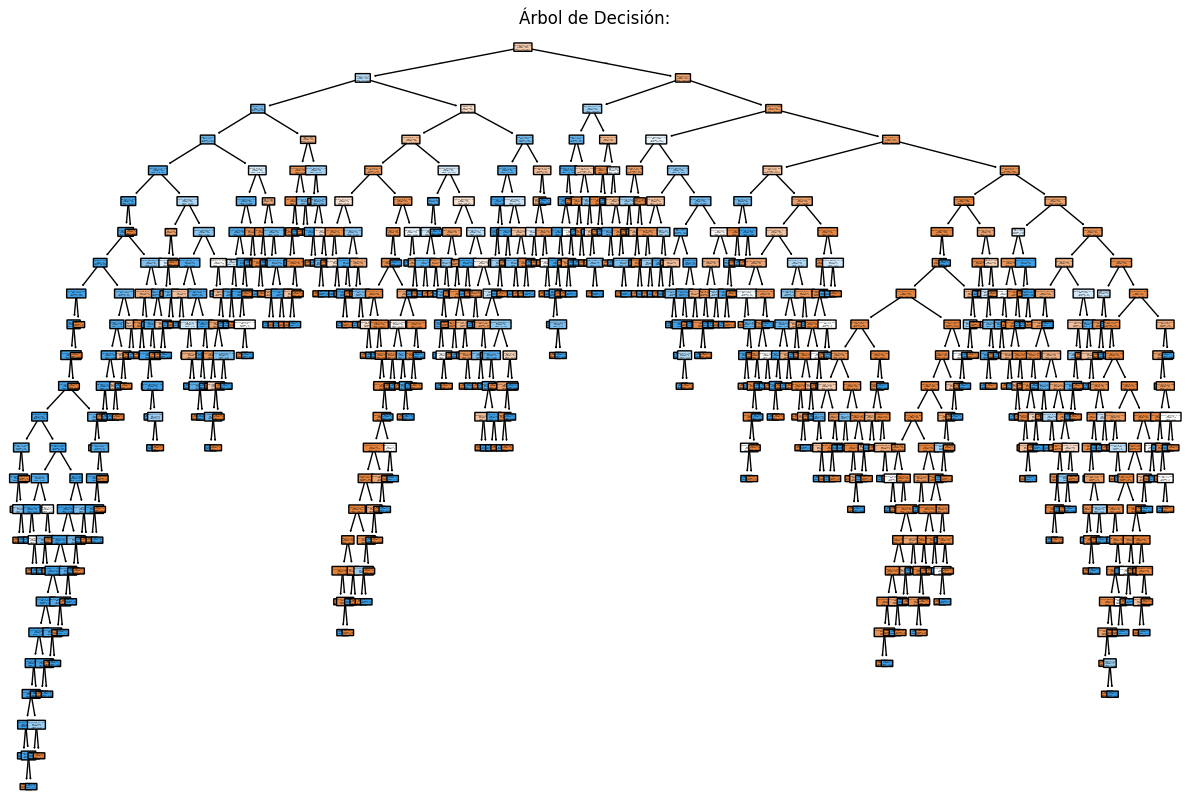

In [55]:
###### ARBOL DE DECISION PRIMITIVO SIN AJUSTE DE HIPERPARAMETROS #####


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Precision en el conjunto de validacion: {accuracy_val * 100:.2f}%')

print("\nClasificacion (Validación):")
print(classification_report(y_val, y_val_pred))

y_test_pred = clf.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Precision en el conjunto de test: {accuracy_test * 100:.2f}%')

# Mostrar el reporte de clasificación para el conjunto de prueba
print("\nClasificacion (Test):")
print(classification_report(y_test, y_test_pred))

# Visualizar el árbol de decisión (opcional)
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["B gana", "A gana"], rounded=True)
plt.title("Árbol de Decisión:")
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Precisión en validación: 86.41%
Precisión en test: 85.81%

Reporte de clasificación (Validación):
              precision    recall  f1-score   support

       False       0.89      0.90      0.89       753
        True       0.81      0.81      0.81       424

    accuracy                           0.86      1177
   macro avg       0.85      0.85      0.85      1177
weighted avg       0.86      0.86      0.86      1177


Reporte de clasificación (Test):
              precision    recall  f1-score   support

       False       0.87      0.91      0.89       746
        True       0.83      0.77      0.80       431

    accuracy                           0.86      1177
   macro avg       0.85      0.84      0.85      1177
weighted avg       0.86      0.86      0.86      1177



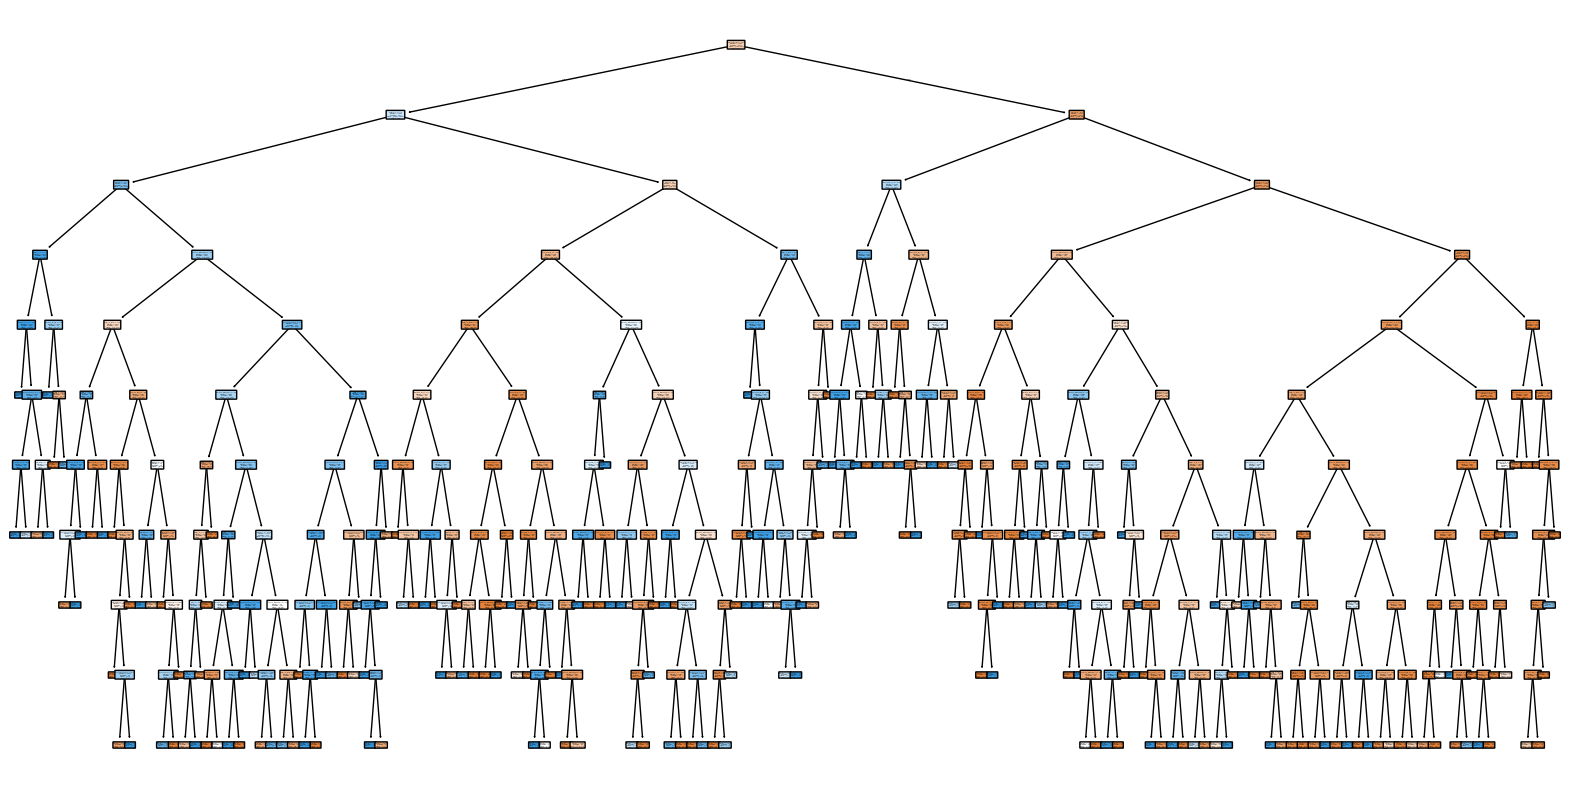

In [56]:
# Definir los hiperparámetros que queremos probar
param_grid = {
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 5],  # Mínimo de muestras en una hoja
    'criterion': ['gini', 'entropy'],  # Criterio para dividir los nodos
    'max_features': ['sqrt', 'log2', None]  # Número máximo de características a considerar
}

# Crear el modelo base
clf = DecisionTreeClassifier(random_state=42)

# Crear el GridSearchCV con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Obtener el mejor modelo entrenado con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Evaluar en el conjunto de validación
y_val_pred = best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Precisión en validación: {accuracy_val * 100:.2f}%')

# Evaluar en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Precisión en test: {accuracy_test * 100:.2f}%')

# Mostrar reporte de clasificación
print("\nReporte de clasificación (Validación):")
print(classification_report(y_val, y_val_pred))

print("\nReporte de clasificación (Test):")
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=["False", "True"], filled=True, rounded=True)
plt.show()


C:\Users\araca\AppData\Local\Temp\ipykernel_19496\2554305338.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feature_importance_df, palette='viridis')


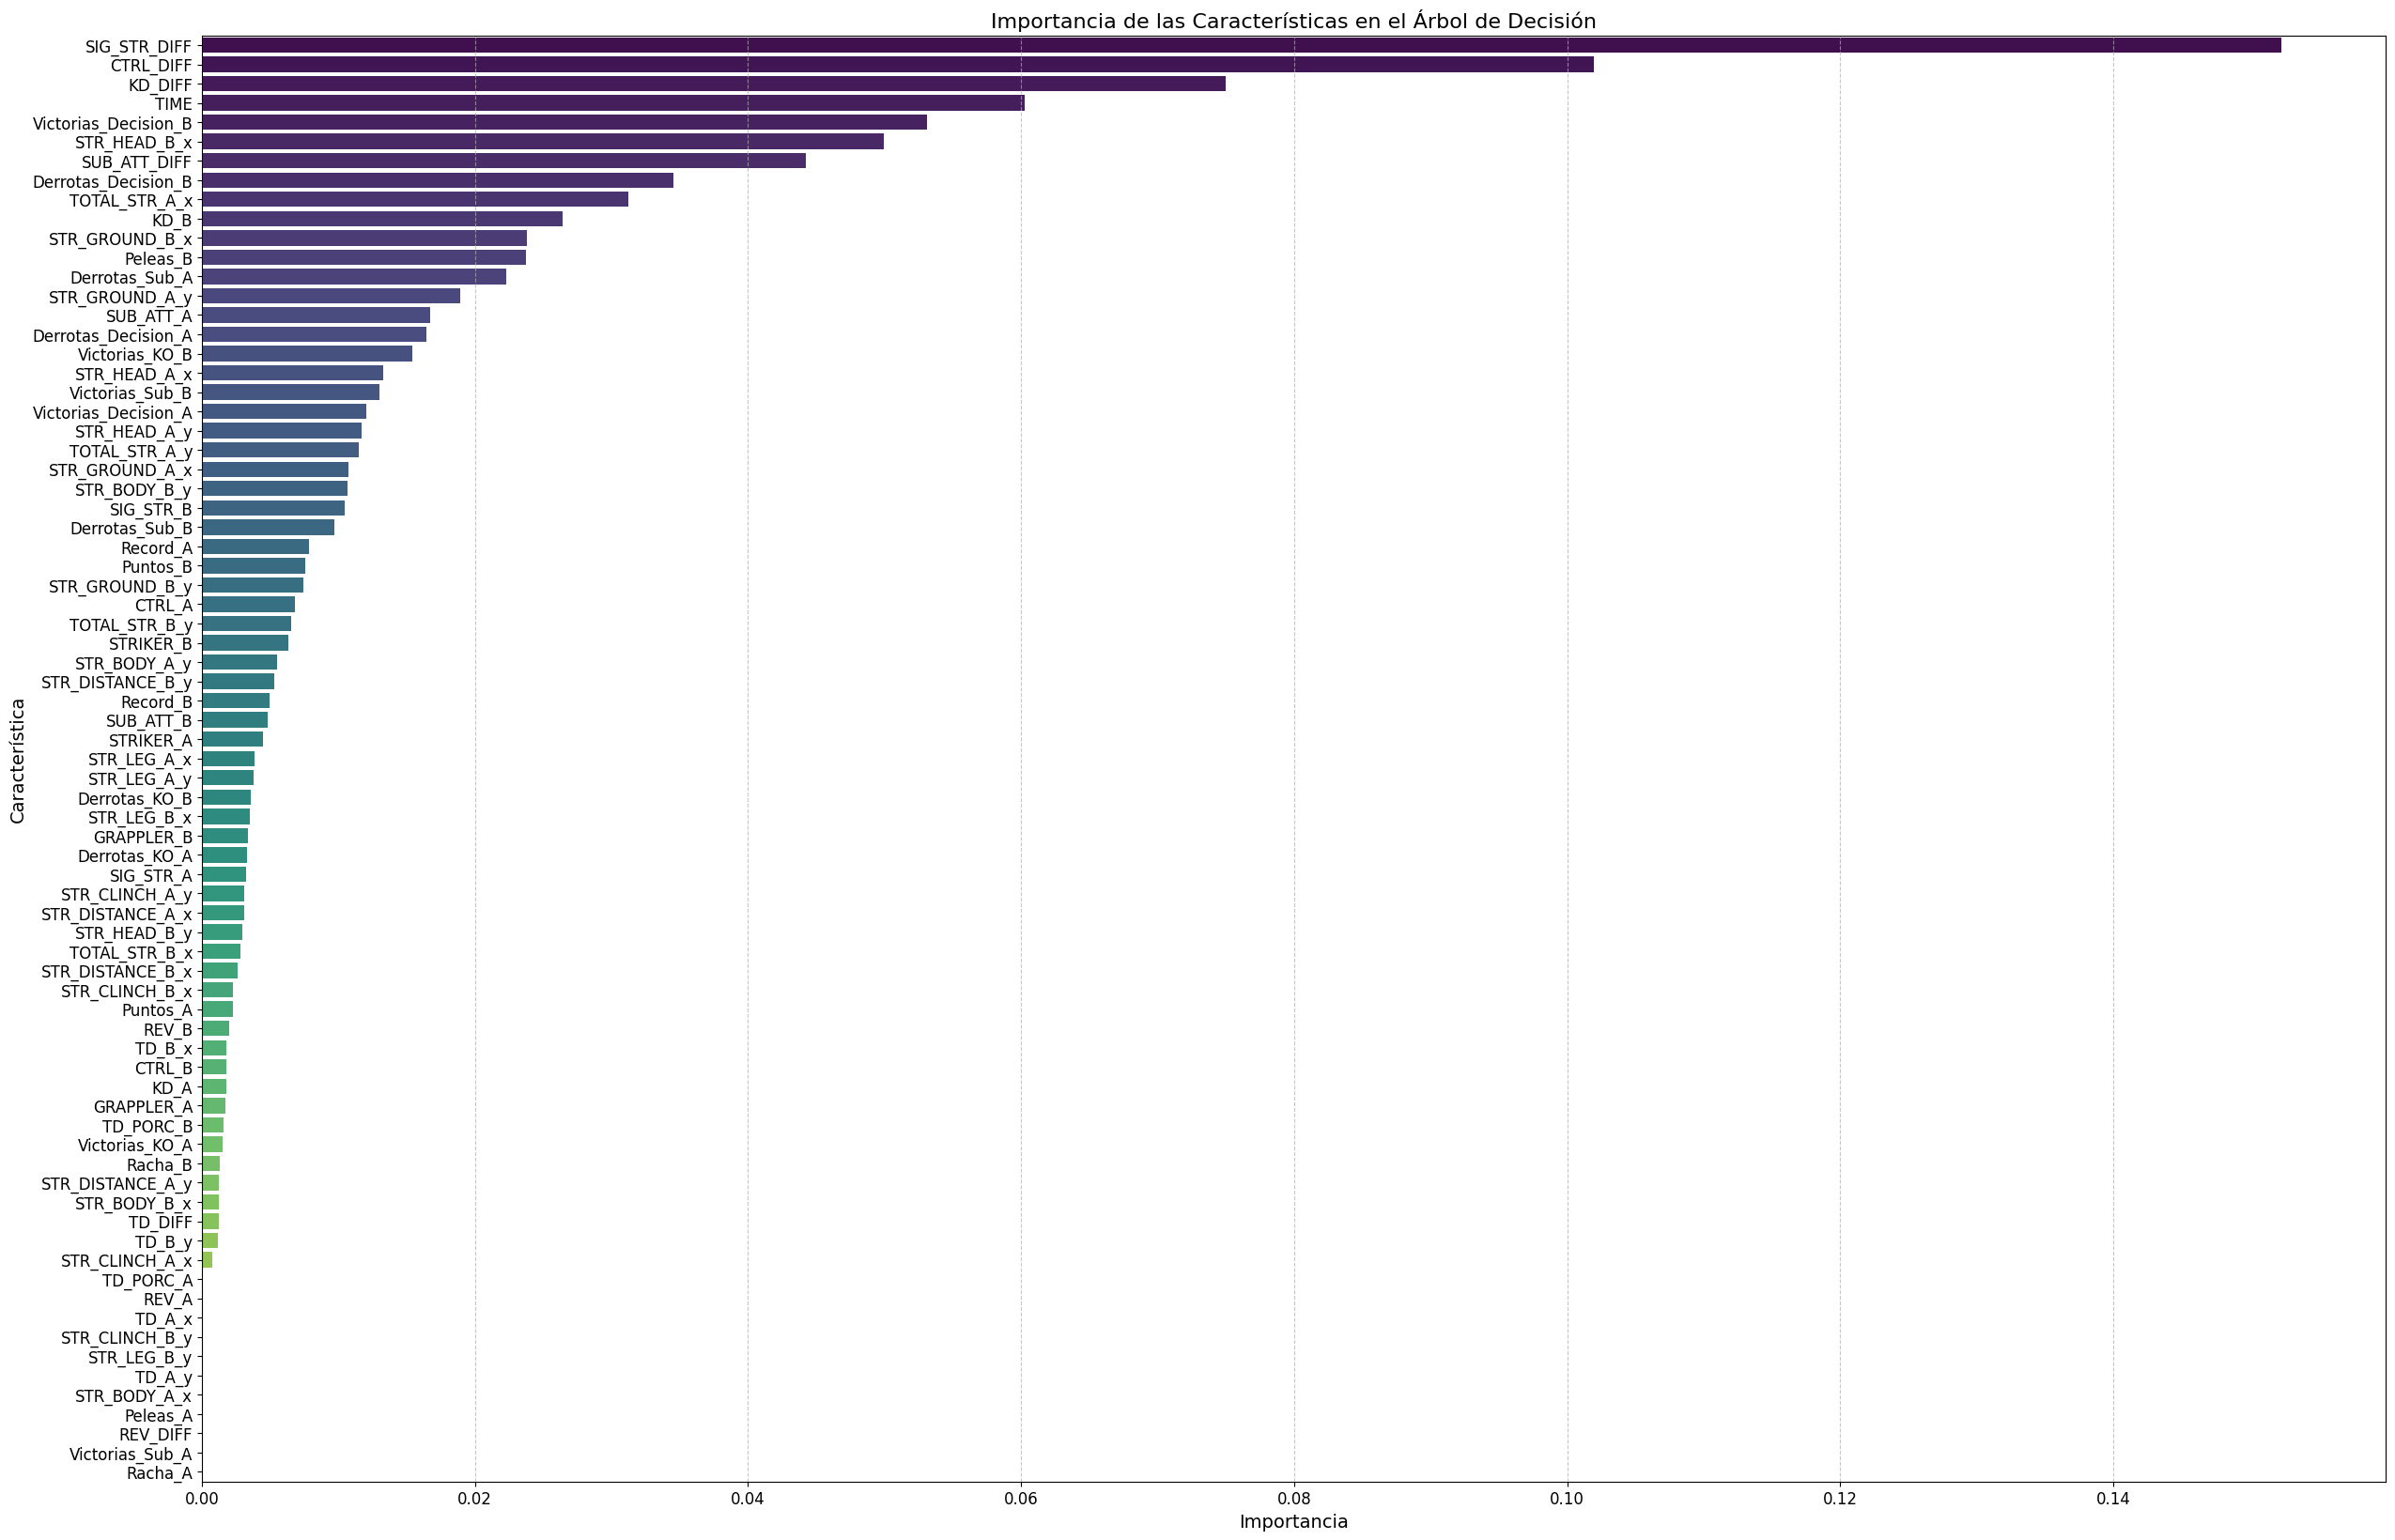

In [57]:
# Obtener la importancia de las características
feature_importance = best_model.feature_importances_

# Crear un DataFrame
feature_importance_df = pd.DataFrame({'Característica': X_train.columns, 'Importancia': feature_importance})

# Ordenar de mayor a menor importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(30, 20))  # Aumentamos el tamaño de la figura
sns.barplot(x='Importancia', y='Característica', data=feature_importance_df, palette='viridis')

# Ajustes de diseño
plt.xlabel('Importancia', fontsize=14)
plt.ylabel('Característica', fontsize=14)
plt.title('Importancia de las Características en el Árbol de Decisión', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregar una rejilla sutil en el eje X

# Mostrar el gráfico
plt.show()


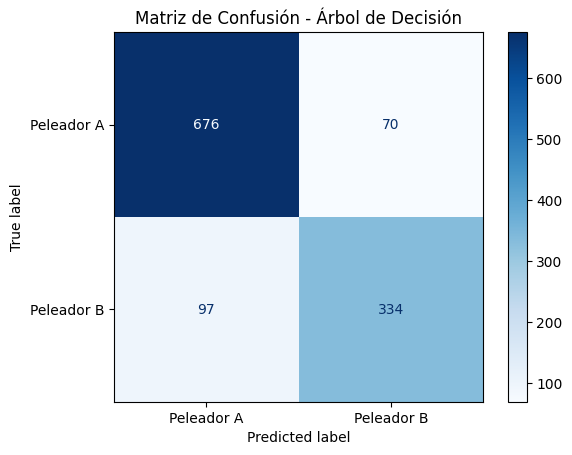

In [ ]:
# Obtener predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Peleador A", "Peleador B"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()


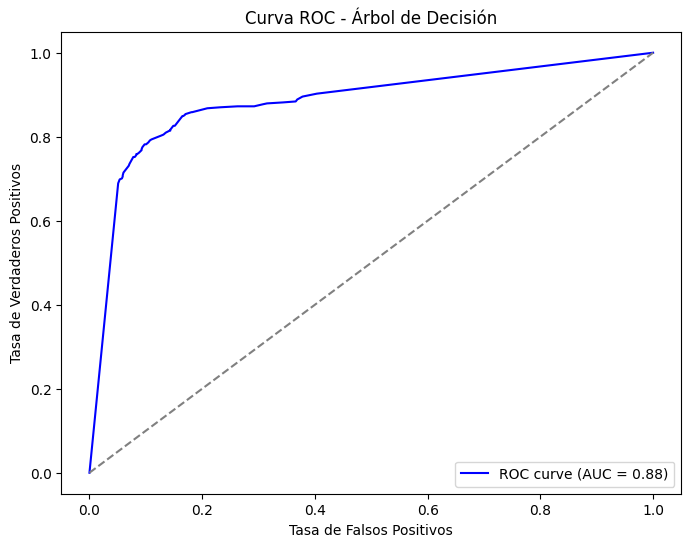

In [ ]:
# Obtener las probabilidades de la clase positiva
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Elegir un índice aleatorio del conjunto de prueba
random_index = random.randint(0, len(X_test) - 1)

# Obtener los datos de esa pelea
pelea_ejemplo = X_test.iloc[random_index:random_index+1]  # Mantener formato DataFrame
pelea_real = y_test.iloc[random_index]  # Etiqueta real

# Hacer la predicción
prediccion = best_model.predict(pelea_ejemplo)[0]  # El modelo devuelve 1 (True) o 0 (False)

# Determinar los ganadores
ganador_real = "Peleador B" if pelea_real else "Peleador A"
ganador_predicho = "Peleador B" if prediccion else "Peleador A"

# Mostrar resultados
print("===== PELEA ALEATORIA =====")
print(pelea_ejemplo)  # Muestra las estadísticas de la pelea
print("\nGanador Real: ", ganador_real)
print("Predicción del Modelo: ", ganador_predicho)


===== PELEA ALEATORIA =====
     TIME  KD_A  KD_B  SIG_STR_A  SIG_STR_B  TD_PORC_A  TD_PORC_B  SUB_ATT_A  \
329   290     0     0       0.67       0.38        1.0       0.33          0   

     SUB_ATT_B  REV_A  ...  Victorias_Sub_A  Victorias_Sub_B  \
329          0      0  ...                1                1   

     Victorias_Decision_A  Victorias_Decision_B  Derrotas_KO_A  Derrotas_KO_B  \
329                     2                     2              1              4   

     Derrotas_Sub_A  Derrotas_Sub_B  Derrotas_Decision_A  Derrotas_Decision_B  
329               0               0                    1                    1  

[1 rows x 75 columns]

Ganador Real:  Peleador A
Predicción del Modelo:  Peleador A
